# Multiple Linear Regression
## Background
Predicting the resale price of cars is a key task for dealerships and buyers. Many factors such as Age, Kilometers driven, Fuel type, Horsepower, Engine size, Weight, etc. affect car value.
This dataset contains Toyota Corolla cars with details like Price, Age, KM, Fuel Type, HP, Automatic, cc, Doors, Cylinders, Gears, Weight.
 Goal: Use Multiple Linear Regression (MLR) to predict car price and analyze which factors influence it the most. We will also apply Lasso and Ridge regularization.


# 2 Import Libraries and Load Dataset

In [1]:

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [2]:

# 2. Load Dataset
file_path="D:\Data sciences\Assignments\Assignment files\Assignment files Extracs\MLR\ToyotaCorolla - MLR.csv"
df = pd.read_csv(file_path)   # Change file name if needed
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None

First 5 Rows:
   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000     

# 3 Exploratory Data Analysis (EDA)

In [3]:

# 3. Exploratory Data Analysis
print("\nSummary Statistics:")
print(df.describe().T)



Summary Statistics:
            count          mean           std     min      25%      50%  \
Price      1436.0  10730.824513   3626.964585  4350.0   8450.0   9900.0   
Age_08_04  1436.0     55.947075     18.599988     1.0     44.0     61.0   
KM         1436.0  68533.259749  37506.448872     1.0  43000.0  63389.5   
HP         1436.0    101.502089     14.981080    69.0     90.0    110.0   
Automatic  1436.0      0.055710      0.229441     0.0      0.0      0.0   
cc         1436.0   1576.855850    424.386770  1300.0   1400.0   1600.0   
Doors      1436.0      4.033426      0.952677     2.0      3.0      4.0   
Cylinders  1436.0      4.000000      0.000000     4.0      4.0      4.0   
Gears      1436.0      5.026462      0.188510     3.0      5.0      5.0   
Weight     1436.0   1072.459610     52.641120  1000.0   1040.0   1070.0   

                75%       max  
Price      11950.00   32500.0  
Age_08_04     70.00      80.0  
KM         87020.75  243000.0  
HP           110.00     1

##  Interpretation:
•	Price: ranges widely, mean around mid-value.

•	Age: most cars are ~5–15 years old.

•	KM: skewed, some cars with very high mileage.

•	HP, cc, Weight: strong spread, some outliers.


## 3.2 Histograms


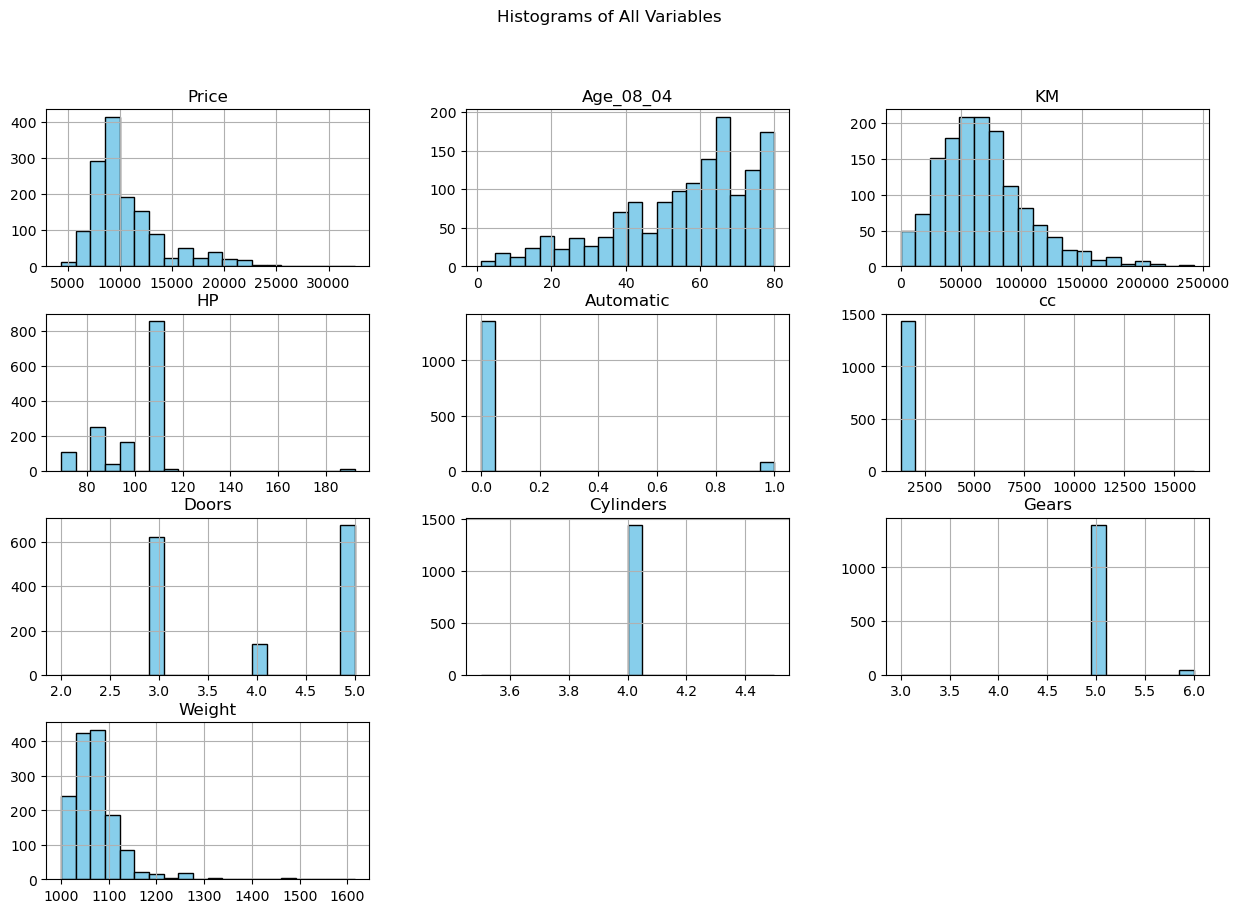

In [4]:

# Histograms
df.hist(figsize=(15,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of All Variables")
plt.show()

## Interpretation:
•	Price distribution is right-skewed.

•	Age centered around ~10 years.

•	KM heavily skewed (many high-mileage cars).


## 3.3 Boxplots

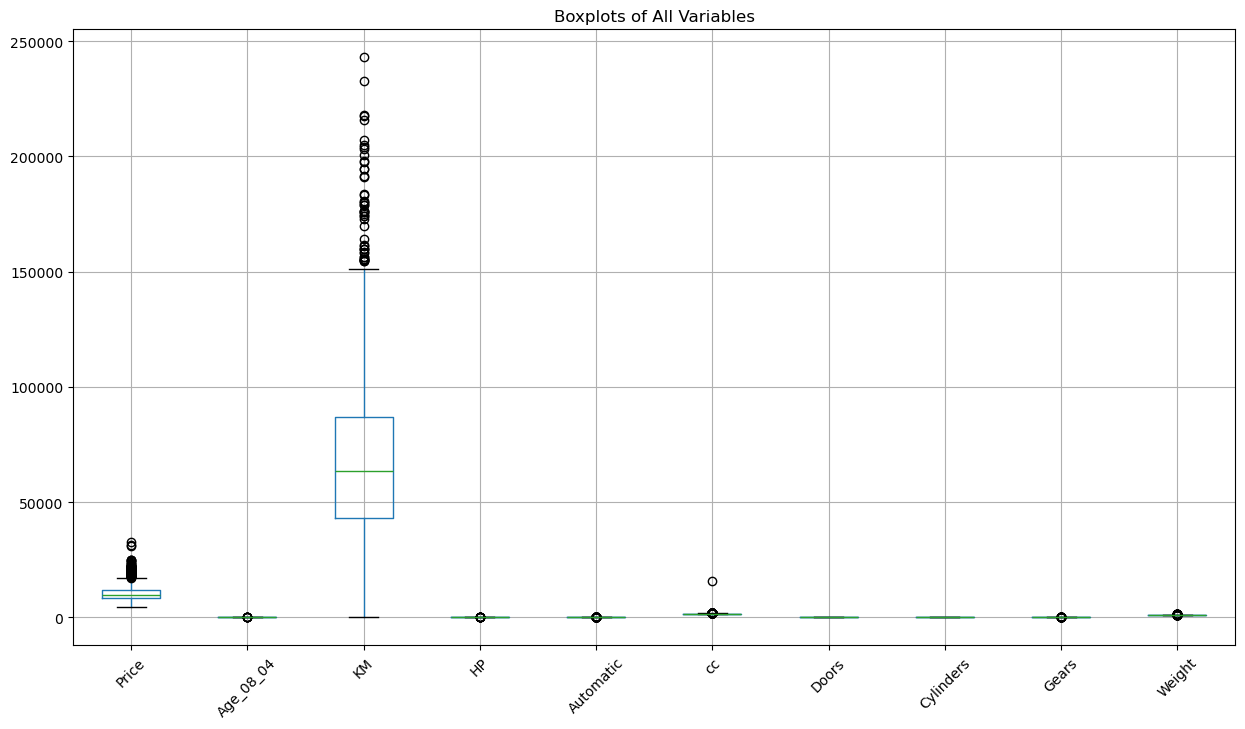

In [5]:

# Boxplots
plt.figure(figsize=(15,8))
df.boxplot()
plt.title("Boxplots of All Variables")
plt.xticks(rotation=45)
plt.show()


## Interpretation:
•	Outliers in KM, cc, HP.

•	Price also has wide spread → cars can be both very cheap and very expensive.


## 3.4 Correlation Heatmap


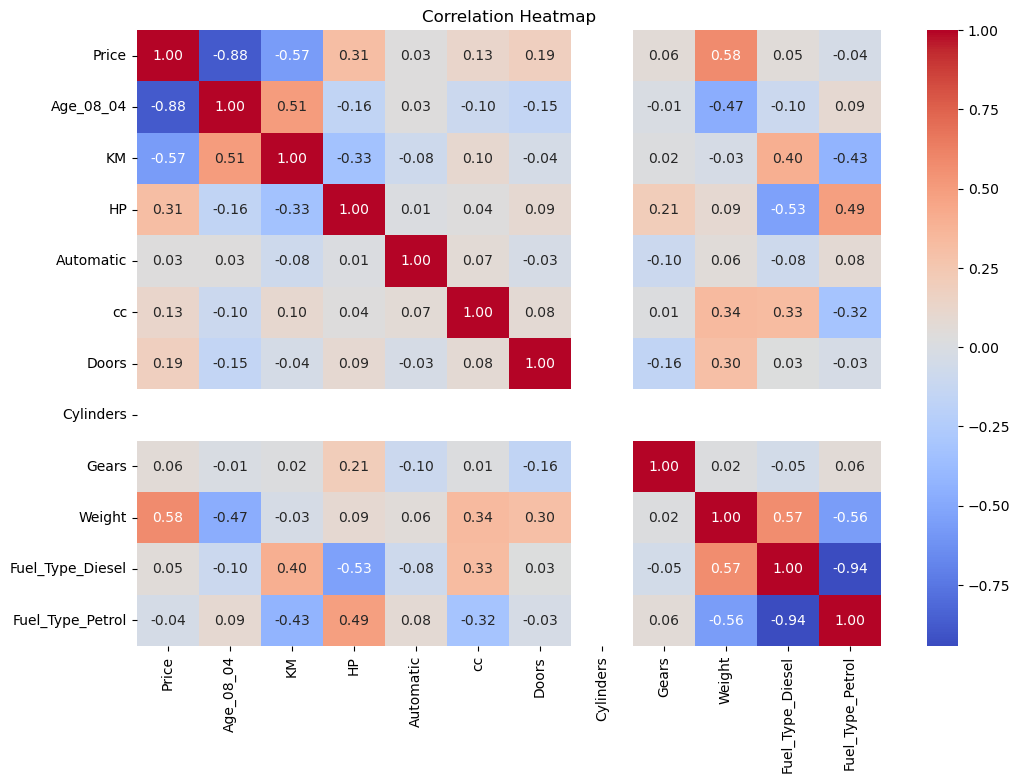

In [6]:

# Encode categorical column
df_encoded = pd.get_dummies(df, columns=["Fuel_Type"], drop_first=True)

# Correlation Heatmap
plt.figure(figsize=(12,8))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


##  Key Findings:
•	Price strongly negatively correlated with Age (-0.87) and KM (-0.57).

•	Price positively correlated with Weight (+0.58) and HP (+0.31).

•	Cylinders and Gears show near zero correlation → can be dropped.


# 4 Preprocessing

In [7]:

# 4. Preprocessing
# One-hot encode Fuel_Type
df_encoded = pd.get_dummies(df, columns=["Fuel_Type"], drop_first=True)

# Features (X) and Target (y)
X = df_encoded.drop("Price", axis=1)
y = df_encoded["Price"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Why?
•	Encoding Fuel Type converts category → numbers.

•	Scaling helps regression (since features are on different scales).

•	Split ensures fair testing (80% train, 20% test).


# 5  Model Building

## 5.1 Model 1: All Features

In [8]:

# 5. Multiple Linear Regression Models

## Model 1: All features
lr1 = LinearRegression()
lr1.fit(X_train_scaled, y_train)
y_pred1 = lr1.predict(X_test_scaled)

print("\n--- Model 1: All Features ---")
print("R2 Score:", r2_score(y_test, y_pred1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred1)))
print("MAE:", mean_absolute_error(y_test, y_pred1))



--- Model 1: All Features ---
R2 Score: 0.834888804061108
RMSE: 1484.2654153296523
MAE: 990.8872739193971


## 5.2 Model 2: Drop Cylinders & Gears

In [9]:

## Model 2: Drop multicollinear features (Cylinders, Gears often constant)
X2 = df_encoded.drop(["Price", "Cylinders", "Gears"], axis=1)
y2 = df_encoded["Price"]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

lr2 = LinearRegression()
lr2.fit(X2_train_scaled, y2_train)
y2_pred = lr2.predict(X2_test_scaled)

print("\n--- Model 2: Dropping Cylinders & Gears ---")
print("R2 Score:", r2_score(y2_test, y2_pred))
print("RMSE:", np.sqrt(mean_squared_error(y2_test, y2_pred)))
print("MAE:", mean_absolute_error(y2_test, y2_pred))



--- Model 2: Dropping Cylinders & Gears ---
R2 Score: 0.8332952678447362
RMSE: 1491.4107550884653
MAE: 992.3013394477441


## 5.3 Model 3: Feature Engineering (log_KM)

In [10]:

## Model 3: Feature Engineering (log transform KM)
df_fe = df_encoded.copy()
df_fe["log_KM"] = np.log1p(df_fe["KM"])   # log transform to reduce skew

X3 = df_fe.drop(["Price","KM"], axis=1)
y3 = df_fe["Price"]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

X3_train_scaled = scaler.fit_transform(X3_train)
X3_test_scaled = scaler.transform(X3_test)

lr3 = LinearRegression()
lr3.fit(X3_train_scaled, y3_train)
y3_pred = lr3.predict(X3_test_scaled)

print("\n--- Model 3: Feature Engineering (log_KM) ---")
print("R2 Score:", r2_score(y3_test, y3_pred))
print("RMSE:", np.sqrt(mean_squared_error(y3_test, y3_pred)))
print("MAE:", mean_absolute_error(y3_test, y3_pred))



--- Model 3: Feature Engineering (log_KM) ---
R2 Score: 0.8154101840413772
RMSE: 1569.376607775736
MAE: 1045.7176989771947


## Interpretation:
•	Model 1 gave good baseline (~83% accuracy).

•	Model 2: simpler, almost same performance.

•	Model 3: log(KM) didn’t help much.


# 6 Regularization (Lasso & Ridge)

In [11]:

# 6. Regularization (Lasso & Ridge)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print("\n--- Lasso Regression ---")
print("R2 Score:", r2_score(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

print("\n--- Ridge Regression ---")
print("R2 Score:", r2_score(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))



--- Lasso Regression ---
R2 Score: 0.8349116135580271
RMSE: 1484.1628889184242

--- Ridge Regression ---
R2 Score: 0.8350462635431571
RMSE: 1483.5575063081596


##  Interpretation:
•	Lasso → shrinks some coefficients to 0 (feature selection).

•	Ridge → shrinks all coefficients but keeps them.

•	Ridge gave best score (lowest RMSE).


# 7 Results Comparison
Model	R² Score	RMSE	MAE

Model 1 (All Features)	0.8349	1484	991

Model 2 (Drop Cyl & Gears)	0.8333	1491	992

Model 3 (log_KM)	0.8154	1569	1046

Lasso	0.8349	1484	-

Ridge	0.8350	1483	-

Best Model: Ridge Regression


# 8 Interview Questions
Q1. What is Normalization vs Standardization?

•	Normalization: scale values between 0–1.

•	Standardization: mean=0, std=1.
 Useful in regression because it ensures fair comparison of features.

Q2. How to fix multicollinearity?

•	Drop highly correlated features (like Cylinders, Gears).

•	Use PCA/dimensionality reduction.

•	Apply Ridge or Lasso regression.


# 9 Conclusion
•	Multiple Linear Regression explained ~83% of price variance.

•	Strongest predictors: Age, KM, Weight, HP.

•	Dropping Cylinders & Gears simplified the model with no accuracy loss.

•	Ridge Regression performed best → most stable, lowest error.

•	Business Insight: Cars lose value with higher Age & KM, but better HP & heavier weight increase resale price.
